In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from sklearn.ensemble import RandomForestClassifier

from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler

# import the metrics class
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [184]:
# Load the data using pandas

df = pd.read_excel('C:/Users/dayeo/Documents/GitHub/Afo/Finance assignemnt/Coursework_DATA.xls', sheet_name='Sheet1')

In [185]:
df.head()

,id,dscode,Year,LagExcessReturn,CASH,INVENTORIES,CURRENT_ASSETS,PROPERTY_PLANT_EQUIPMENT,TOTAL_INTANGIBLE,TOTAL_ASSETS,...,OPERATING_INCOME,INTEREST_EXPENSE_ON_DEBT,EBIT,PRETAX_INCOME,INCOME_TAXES,NET_INCOME_BEFORE_EXTRA_ITEMS,NET_INCOME_AVAILABLE_TO_COMMON,OPERATING_CASH_FLOW,MARKET_VALUE,EBTDA
0,505,27947W,2013,-0.035987,107505.0,0.0,117515.0,388.0,597.0,119712,...,-12566,0.0,-9639.0,-9639,0,-9639,-9639,-7468,43710.0,-9370.0
1,778,29262P,2013,1.580063,10284.0,0.0,23615.0,72.0,11571.0,35257,...,-1579,77.0,-1043.0,-1120,-174,-946,-946,97,5390.0,-1090.0
2,1037,30463C,2013,-0.894205,5553.0,1.0,8476.0,64.0,7357.0,16427,...,-542,0.0,-497.0,-497,28,-1413,-1413,-323,8510.0,-485.0
3,1400,35607F,2013,-0.373189,1447.0,0.0,1516.0,250.0,3792.0,5558,...,-892,222.0,-2318.0,-5095,0,-5095,-5095,-189,18660.0,NaN
4,4213,999779,2013,0.090696,16072.0,0.0,16505.0,0.0,32531.0,49555,...,-2956,0.0,-1784.0,-1784,0,-1784,-1784,-744,114290.0,-1746.0


In [186]:
df.shape

(11943, 31)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11943 entries, 0 to 11942
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11943 non-null  int64  
 1   dscode                          11943 non-null  object 
 2   Year                            11943 non-null  int64  
 3   LagExcessReturn                 11943 non-null  float64
 4   CASH                            11943 non-null  float64
 5   INVENTORIES                     11943 non-null  float64
 6   CURRENT_ASSETS                  11943 non-null  float64
 7   PROPERTY_PLANT_EQUIPMENT        11943 non-null  float64
 8   TOTAL_INTANGIBLE                11943 non-null  float64
 9   TOTAL_ASSETS                    11943 non-null  int64  
 10  ACCOUNTS_PAYEABLE               11943 non-null  float64
 11  CURRENT_LIABILITIES             11943 non-null  float64
 12  WORKING_CAPITAL                 

![alt text](image.png)

# Liquidity 
Current assets / Total assets <br>
Cash and equivalent / current liabilities <br>
Current assets / current liabilities <br>
Sales / inventory <br>
Current assets / sales<br>
Current assets / total liabilities<br>

# Solvency 
Total Liabilities / sales<br>
Total liabilities / assets<br>
The book value of equity / Total liabilities<br>
Interest/EBITDA <br>


# Market information 
Lag (excess return) <br>
Market capital <br>
Market value / Total Equity <br>


# Profitability 
Net income / Total assets <br>
Net income / Total Equity <br>

# Asset utilisation 
Working capital / sales <br>
Quick assets / sales <br>

# Cash flow 
Operating cash flow / Total liabilities<br>
Operating cash flow / Total assets<br>

# Making the final ratios - Feature Creation 

In [188]:
# Exploring the columns of the dataframe

df.columns

Index(['id', 'dscode', 'Year', 'LagExcessReturn', 'CASH', 'INVENTORIES',
       'CURRENT_ASSETS', 'PROPERTY_PLANT_EQUIPMENT', 'TOTAL_INTANGIBLE',
       'TOTAL_ASSETS', 'ACCOUNTS_PAYEABLE', 'CURRENT_LIABILITIES',
       'WORKING_CAPITAL', 'TOTAL_DEBT', 'TOTAL_LIABILITIES', 'COMMON_EQUITY',
       'TOTAL_SHAREHOLDERS_EQUITY', 'TOTAL_EQUITY', 'NET_SALES', 'COGSD',
       'GROSS_INCOME', 'OPERATING_INCOME', 'INTEREST_EXPENSE_ON_DEBT', 'EBIT',
       'PRETAX_INCOME', 'INCOME_TAXES', 'NET_INCOME_BEFORE_EXTRA_ITEMS',
       'NET_INCOME_AVAILABLE_TO_COMMON', 'OPERATING_CASH_FLOW', 'MARKET_VALUE',
       'EBTDA'],
      dtype='object')

In [189]:
# Creating financial ratios using lambda functions

# Liquidity (l1) =  Current assets / Total assets 

df['l1'] = df.apply(lambda x: x['CURRENT_ASSETS'] / x['TOTAL_ASSETS'], axis=1)



In [190]:
# Liquidity  (l2) = Cash and equivalent / current liabilities

df['l2'] = df.apply(lambda x: x['CASH'] / x['CURRENT_LIABILITIES'], axis=1)

In [191]:
# Liquidity (l3) = Current assets / current liabilities

df['l3'] = df.apply(lambda x: x['CURRENT_ASSETS'] / x['CURRENT_LIABILITIES'], axis=1)

In [192]:
# Liquidity (l4) = Sales / inventory

# on the first try, I got an error because of division by zero. I had to add a condition to check if the denominator is zero.
df['l4'] = df.apply(lambda x: x['NET_SALES'] / x['INVENTORIES'] if x['INVENTORIES'] != 0 else 0, axis=1)


In [193]:
# Liquidity (l5) = Current assets / sales

df['l5'] = df.apply(lambda x: x['CURRENT_ASSETS'] / x['NET_SALES'] if x['NET_SALES'] != 0 else 0, axis=1)

In [194]:
# Liquidity (l6) = Current liabilities / sales

df['l6'] = df.apply(lambda x: x['CURRENT_LIABILITIES'] / x['NET_SALES'] if x['NET_SALES'] != 0 else 0, axis=1)

In [195]:
# Solvency (s1) = Total Liabilities / sales

df['s1'] = df.apply(lambda x: x['TOTAL_LIABILITIES'] / x['NET_SALES'] if x['NET_SALES'] != 0 else 0, axis=1)

# Solvency (s2) = Total liabilities / assets

df['s2'] = df.apply(lambda x: x['TOTAL_LIABILITIES'] / x['TOTAL_ASSETS'] if x['TOTAL_ASSETS'] != 0 else 0, axis=1)

# Solvency (s3) = The book value of equity / Total liabilities

df['s3'] = df.apply(lambda x: x['TOTAL_SHAREHOLDERS_EQUITY'] / x['TOTAL_LIABILITIES'] if x['TOTAL_LIABILITIES'] != 0 else 0, axis=1)

# Solvency (s4) = Interest/EBITDA

df['s4'] = df.apply(lambda x: x['INTEREST_EXPENSE_ON_DEBT'] / x['EBTDA'] if x['EBTDA'] != 0 else 0, axis=1)

In [196]:
# Market information (m1) = Market value / Total Equity

df['m1'] = df.apply(lambda x: x['MARKET_VALUE'] / x['TOTAL_EQUITY'] if x['TOTAL_EQUITY'] != 0 else 0, axis=1)



In [197]:
# Profitability (p1) = Net income / Total assets

df['p1'] = df.apply(lambda x: x['NET_INCOME_AVAILABLE_TO_COMMON'] / x['TOTAL_ASSETS'] if x['TOTAL_ASSETS'] != 0 else 0, axis=1)

# Profitability (p2) = Net income / Total Equity

df['p2'] = df.apply(lambda x: x['NET_INCOME_AVAILABLE_TO_COMMON'] / x['TOTAL_EQUITY'] if x['TOTAL_EQUITY'] != 0 else 0, axis=1)


In [198]:
# Asset utilisation (a1) = Working capital / sales

df['a1'] = df.apply(lambda x: x['WORKING_CAPITAL'] / x['NET_SALES'] if x['NET_SALES'] != 0 else 0, axis=1)

# Asset utilisation (a2) = Quick assets / sales

df['a2'] = df.apply(lambda x: x['CASH'] / x['NET_SALES'] if x['NET_SALES'] != 0 else 0, axis=1)


In [199]:
# Cash flow (c1) = Operating cash flow / Total liabilities

df['c1'] = df.apply(lambda x: x['OPERATING_CASH_FLOW'] / x['TOTAL_LIABILITIES'] if x['TOTAL_LIABILITIES'] != 0 else 0, axis=1)

# Cash flow (c2) = Operating cash flow / Total assets

df['c2'] = df.apply(lambda x: x['OPERATING_CASH_FLOW'] / x['TOTAL_ASSETS'] if x['TOTAL_ASSETS'] != 0 else 0, axis=1)


In [200]:
df.shape

(11943, 48)

# Cleaning Data
### Excludeing companies that have been listed for less than two years. 


In [201]:
df.columns

Index(['id', 'dscode', 'Year', 'LagExcessReturn', 'CASH', 'INVENTORIES',
       'CURRENT_ASSETS', 'PROPERTY_PLANT_EQUIPMENT', 'TOTAL_INTANGIBLE',
       'TOTAL_ASSETS', 'ACCOUNTS_PAYEABLE', 'CURRENT_LIABILITIES',
       'WORKING_CAPITAL', 'TOTAL_DEBT', 'TOTAL_LIABILITIES', 'COMMON_EQUITY',
       'TOTAL_SHAREHOLDERS_EQUITY', 'TOTAL_EQUITY', 'NET_SALES', 'COGSD',
       'GROSS_INCOME', 'OPERATING_INCOME', 'INTEREST_EXPENSE_ON_DEBT', 'EBIT',
       'PRETAX_INCOME', 'INCOME_TAXES', 'NET_INCOME_BEFORE_EXTRA_ITEMS',
       'NET_INCOME_AVAILABLE_TO_COMMON', 'OPERATING_CASH_FLOW', 'MARKET_VALUE',
       'EBTDA', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 's1', 's2', 's3', 's4',
       'm1', 'p1', 'p2', 'a1', 'a2', 'c1', 'c2'],
      dtype='object')

In [202]:
df.nunique()
# There're 2092 ids in the dataset
df.id.nunique()


2092

In [203]:
df.Year.unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [204]:
# Grouping the data by the id column

df.groupby('id')['Year'].count().reset_index().sort_values('Year')

df_grouped = df.groupby('id')['Year'].count().reset_index()



In [205]:
# Checking for id that have less than 2 years

companies_2 = df_grouped[df_grouped['Year'] < 2]

In [206]:

companies_id_2 = companies_2.id.unique()

companies_2.id.unique()


array([  29,   57,   66,  121,  139,  151,  207,  210,  212,  237,  280,
        287,  328,  339,  344,  348,  351,  358,  363,  372,  421,  429,
        440,  441,  460,  477,  510,  514,  519,  529,  530,  546,  559,
        568,  581,  592,  600,  610,  613,  635,  642,  649,  655,  662,
        672,  673,  696,  703,  716,  756,  769,  771,  779,  797,  800,
        839,  872,  886,  887,  894,  926,  930,  933,  947,  967, 1001,
       1027, 1034, 1068, 1073, 1076, 1103, 1104, 1132, 1162, 1175, 1189,
       1198, 1217, 1269, 1290, 1332, 1462, 1679, 1695, 1867, 1885, 1898,
       1915, 1918, 1926, 1937, 1950, 1956, 2018, 2200, 2205, 2231, 2247,
       2318, 2360, 2449, 2513, 2515, 2518, 2533, 2597, 2651, 2666, 2752,
       2835, 2973, 2996, 3021, 3040, 3059, 3105, 3172, 3247, 3367, 3440,
       3466, 3582, 3667, 3673, 3807, 3836, 3978, 3979, 4084, 4096, 4107,
       4116], dtype=int64)

In [207]:
# removing comanies that have less than 2 years from the dataset

df = df[~df['id'].isin(companies_id_2)]

In [208]:
df.shape

(11810, 48)

In [209]:
# Checking for conmpanies that were removed at random. I checked for company with id 1695. 

df['id'].where(df['id'] == 1695).count()

0

# Removing Missing Values

In [210]:
df.isnull().count()

id                                11810
dscode                            11810
Year                              11810
LagExcessReturn                   11810
CASH                              11810
INVENTORIES                       11810
CURRENT_ASSETS                    11810
PROPERTY_PLANT_EQUIPMENT          11810
TOTAL_INTANGIBLE                  11810
TOTAL_ASSETS                      11810
ACCOUNTS_PAYEABLE                 11810
CURRENT_LIABILITIES               11810
WORKING_CAPITAL                   11810
TOTAL_DEBT                        11810
TOTAL_LIABILITIES                 11810
COMMON_EQUITY                     11810
TOTAL_SHAREHOLDERS_EQUITY         11810
TOTAL_EQUITY                      11810
NET_SALES                         11810
COGSD                             11810
GROSS_INCOME                      11810
OPERATING_INCOME                  11810
INTEREST_EXPENSE_ON_DEBT          11810
EBIT                              11810
PRETAX_INCOME                     11810


In [211]:
df.isna().sum()

id                                   0
dscode                               0
Year                                 0
LagExcessReturn                      0
CASH                                 0
INVENTORIES                          0
CURRENT_ASSETS                       0
PROPERTY_PLANT_EQUIPMENT             0
TOTAL_INTANGIBLE                     0
TOTAL_ASSETS                         0
ACCOUNTS_PAYEABLE                    0
CURRENT_LIABILITIES                  0
WORKING_CAPITAL                      0
TOTAL_DEBT                           0
TOTAL_LIABILITIES                    0
COMMON_EQUITY                        0
TOTAL_SHAREHOLDERS_EQUITY            0
TOTAL_EQUITY                         0
NET_SALES                            0
COGSD                                0
GROSS_INCOME                         0
OPERATING_INCOME                     0
INTEREST_EXPENSE_ON_DEBT             0
EBIT                                 0
PRETAX_INCOME                        0
INCOME_TAXES             

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11810 entries, 0 to 11942
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11810 non-null  int64  
 1   dscode                          11810 non-null  object 
 2   Year                            11810 non-null  int64  
 3   LagExcessReturn                 11810 non-null  float64
 4   CASH                            11810 non-null  float64
 5   INVENTORIES                     11810 non-null  float64
 6   CURRENT_ASSETS                  11810 non-null  float64
 7   PROPERTY_PLANT_EQUIPMENT        11810 non-null  float64
 8   TOTAL_INTANGIBLE                11810 non-null  float64
 9   TOTAL_ASSETS                    11810 non-null  int64  
 10  ACCOUNTS_PAYEABLE               11810 non-null  float64
 11  CURRENT_LIABILITIES             11810 non-null  float64
 12  WORKING_CAPITAL                 11810

# Accounting Variables:

Balance Sheet Items:
CASH, 
INVENTORIES, 
CURRENT_ASSETS, 
PROPERTY_PLANT_EQUIPMENT, 
TOTAL_INTANGIBLE, 
TOTAL_ASSETS, 
ACCOUNTS_PAYABLE, 
CURRENT_LIABILITIES,
WORKING_CAPITAL, 
TOTAL_DEBT, 
TOTAL_LIABILITIES, 
COMMON_EQUITY, 
TOTAL_SHAREHOLDERS_EQUITY,
TOTAL_EQUITY, 
NET_SALES, 
COGS (Cost of Goods Sold), 
GROSS_INCOME, 
OPERATING_INCOME, 
INTEREST_EXPENSE_ON_DEBT, 
EBIT (Earnings Before Interest and Taxes), 
PRETAX_INCOME, 
INCOME_TAXES, 
NET_INCOME_BEFORE_EXTRA_ITEMS,
NET_INCOME_AVAILABLE_TO_COMMON, 
OPERATING_CASH_FLOW. 

# Market-Based Variables:

MARKET_VALUE
EBTDA

In [213]:
df.dropna(inplace=True)

In [214]:
df.shape

(10320, 48)

In [215]:
# Winsorizing the data between the 1st and 99th percentile



df_winsorized = df.copy()

# df_winsorized = df_winsorized.apply(lambda x: winsorize(x, limits=[0.01, 0.01]), axis = 0)

In [216]:
df_winsorized.apply(lambda x: winsorize(x, limits=[0.01, 0.01]), )

C:\Users\dayeo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\_lib\_util.py:729: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  for el in a.ravel():


,id,dscode,Year,LagExcessReturn,CASH,INVENTORIES,CURRENT_ASSETS,PROPERTY_PLANT_EQUIPMENT,TOTAL_INTANGIBLE,TOTAL_ASSETS,...,s2,s3,s4,m1,p1,p2,a1,a2,c1,c2
0,505,27947W,2013,-0.035987,107505.0,0.0,117515.0,388.0,597.0,119712,...,0.059894,15.696095,-0.000000,0.387593,-0.080518,-0.085473,43.930067,42.475306,-1.041562,-0.062383
1,778,29262P,2013,1.580063,10284.0,0.0,23615.0,72.0,11571.0,35257,...,0.193011,4.181043,-0.070642,0.186499,-0.026832,-0.032732,105.414634,50.165854,0.014254,0.002751
2,1037,30463C,2013,-0.894205,5553.0,1.0,8476.0,64.0,7357.0,16427,...,0.049613,19.155828,-0.000000,0.545094,-0.086017,-0.090507,0.000000,0.000000,-0.396319,-0.019663
4,4137,974585,2013,0.090696,16072.0,0.0,16505.0,0.0,32531.0,49555,...,0.021148,46.285305,-0.000000,2.356155,-0.036000,-0.036778,39.077889,40.381910,-0.709924,-0.015014
5,2777,900998,2013,-0.163253,799000.0,1478800.0,5082000.0,6571925.0,2782000.0,16611966,...,0.570432,0.590122,0.177910,1.288452,0.048820,0.091229,0.107143,0.070285,0.194069,0.110703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11938,1087,30857U,2020,0.155650,15134.0,79.0,83063.0,12808.0,237624.0,333495,...,1.028897,-0.028085,0.027338,-12.913907,0.227602,-7.885714,-0.943414,0.056207,0.317624,0.326803
11939,355,261789,2020,-0.412334,280.0,0.0,1420.0,20.0,1792.0,3232,...,0.128094,6.806763,0.000000,1.462030,0.047339,0.054294,0.766244,0.221870,0.458937,0.058787
11940,1820,51921C,2020,-0.124651,5504.0,0.0,7113.0,200.0,4922.0,12234,...,0.349109,1.864435,-0.012493,2.469680,-0.459702,-0.620066,7.023041,8.454685,-1.348396,-0.470737
11941,149,136904,2020,0.374340,2531.0,3933.0,16405.0,2865.0,5653.0,24923,...,0.321952,2.106057,-0.000000,3.231552,-0.112948,-0.166578,0.257021,0.076930,0.202891,0.065321


In [217]:
"""# Creating a new column to mark financially distressed firms

df_winsorized['D'] = df_winsorized.apply(lambda x: 1 if (x['INTEREST_EXPENSE_ON_DEBT'] > x['EBTDA']) & (x['MARKET_VALUE'] < 0) else 0, axis=1)
#df_winsorized['D'].value_counts(normalize=True)"""

"# Creating a new column to mark financially distressed firms\n\ndf_winsorized['D'] = df_winsorized.apply(lambda x: 1 if (x['INTEREST_EXPENSE_ON_DEBT'] > x['EBTDA']) & (x['MARKET_VALUE'] < 0) else 0, axis=1)\n#df_winsorized['D'].value_counts(normalize=True)"

In [218]:
df_winsorized['Condition_1'] = df_winsorized['INTEREST_EXPENSE_ON_DEBT'] > df_winsorized['EBTDA']

df_winsorized['Distress_Condition_1'] = df_winsorized.groupby('id')['Condition_1'].rolling(window=2).apply(lambda x: all(x)).reset_index(0, drop=True)



In [219]:
df_winsorized['Previous_Market_Value'] = df_winsorized.groupby('id')['MARKET_VALUE'].shift(1)


In [220]:
df_winsorized['Market_Growth'] = df_winsorized['MARKET_VALUE'] - df_winsorized['Previous_Market_Value']

df_winsorized['Condition_2'] = df_winsorized['Market_Growth'] < 0 

df_winsorized['Distress_Condition_2'] = df_winsorized.groupby('id')['Condition_2'].rolling(window=2).apply(lambda x: all(x)).reset_index(0, drop=True)

df_winsorized['D'] = ((df_winsorized['Distress_Condition_1'] == 1) & (df_winsorized['Distress_Condition_2'] == 1)).astype(int)



In [221]:

df_winsorized.D.value_counts()

D
0    9773
1     547
Name: count, dtype: int64

In [222]:
# Dropping columns 


df_winsorized.drop(['Condition_1', 'Distress_Condition_1', 'Previous_Market_Value', 'Market_Growth', 'Condition_2', 'Distress_Condition_2'], axis=1, inplace=True)

In [223]:
# Dropping columns that are not needed for the model

df_winsorized.drop(['dscode', ], axis=1, inplace=True)

In [224]:
# Arranging the columns in the dataframe chronologically

df_winsorized.Year = pd.to_datetime(df_winsorized.Year, format='%Y')

# df_winsorized = df_winsorized.sort_values(['id', 'Year'])

In [225]:
df_winsorized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10320 entries, 0 to 11942
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              10320 non-null  int64         
 1   Year                            10320 non-null  datetime64[ns]
 2   LagExcessReturn                 10320 non-null  float64       
 3   CASH                            10320 non-null  float64       
 4   INVENTORIES                     10320 non-null  float64       
 5   CURRENT_ASSETS                  10320 non-null  float64       
 6   PROPERTY_PLANT_EQUIPMENT        10320 non-null  float64       
 7   TOTAL_INTANGIBLE                10320 non-null  float64       
 8   TOTAL_ASSETS                    10320 non-null  int64         
 9   ACCOUNTS_PAYEABLE               10320 non-null  float64       
 10  CURRENT_LIABILITIES             10320 non-null  float64       
 11  WORKING

# Chekcing for Multicollinearity

In [226]:
"""# Step 1: Calculate correlation matrix
correlation_matrix = df_winsorized.corr()

correlation_matrix

# Set the correlation threshold
correlation_threshold = 0.8

# Find the highly correlated columns
highly_correlated_cols = []
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix[correlation_matrix[col] > correlation_threshold].index.tolist()
    correlated_cols.remove(col)
    if correlated_cols:
        highly_correlated_cols.append((col, correlated_cols))

# Print the highly correlated columns
for col, correlated_cols in highly_correlated_cols:
    print(f"Column '{col}' is highly correlated with columns: {', '.join(correlated_cols)}")"""




'# Step 1: Calculate correlation matrix\ncorrelation_matrix = df_winsorized.corr()\n\ncorrelation_matrix\n\n# Set the correlation threshold\ncorrelation_threshold = 0.8\n\n# Find the highly correlated columns\nhighly_correlated_cols = []\nfor col in correlation_matrix.columns:\n    correlated_cols = correlation_matrix[correlation_matrix[col] > correlation_threshold].index.tolist()\n    correlated_cols.remove(col)\n    if correlated_cols:\n        highly_correlated_cols.append((col, correlated_cols))\n\n# Print the highly correlated columns\nfor col, correlated_cols in highly_correlated_cols:\n    print(f"Column \'{col}\' is highly correlated with columns: {\', \'.join(correlated_cols)}")'

# Dealing with imbalanced classess

In [227]:
df_winsorized.D.value_counts()

# Resampling the data to have equal number of financially distressed and non-distressed firms using SMOTE

# Separate the independent variables from the dependent variable


D
0    9773
1     547
Name: count, dtype: int64

In [228]:

"""X = df_winsorized.drop(['D', 'id', 'Year'], axis=1)
y = df_winsorized['D']

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the value counts of the dependent variable in the resampled data

pd.Series(y_train_resampled).value_counts()"""

"X = df_winsorized.drop(['D', 'id', 'Year'], axis=1)\ny = df_winsorized['D']\n\n# Split the data into training and testing sets\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)\n\n# Apply SMOTE to the training data\n\nsmote = SMOTE(random_state=42)\nX_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)\n\n# Check the value counts of the dependent variable in the resampled data\n\npd.Series(y_train_resampled).value_counts()"

# Without Feature selection 



# Splitting Data in to train and test samples

In [229]:
df_winsorized.Year.value_counts()

Year
2013-01-01    1658
2014-01-01    1544
2015-01-01    1364
2016-01-01    1283
2017-01-01    1233
2018-01-01    1166
2019-01-01    1079
2020-01-01     993
Name: count, dtype: int64

In [230]:
# Dividing the data in the training and test sample. 

# Splitting the data into training and test sets
# Training set from the year 2015 to 2018 

df_train = df_winsorized[(df_winsorized.Year > "2014-01-01") & (df_winsorized.Year < "2019-01-01")]

# Test set from the year 2019 to 2020

df_test = df_winsorized[df_winsorized.Year > "2018-01-01"]



In [231]:
df_train.Year.value_counts()


Year
2015-01-01    1364
2016-01-01    1283
2017-01-01    1233
2018-01-01    1166
Name: count, dtype: int64

In [232]:
df_test.Year.value_counts()

Year
2019-01-01    1079
2020-01-01     993
Name: count, dtype: int64

In [233]:
# drop year column from training set

df_train.drop(['Year'], axis = 1, inplace = True)
df_test.drop(['Year'], axis = 1, inplace = True)


C:\Users\dayeo\AppData\Local\Temp\ipykernel_24164\521649643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['Year'], axis = 1, inplace = True)
C:\Users\dayeo\AppData\Local\Temp\ipykernel_24164\521649643.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['Year'], axis = 1, inplace = True)


In [234]:
X_train = df_train.drop(['D', 'id'], axis=1)

y_train = df_train['D']

X_test = df_test.drop(['D', 'id'], axis=1)

y_test = df_test['D']

In [235]:
X_train.shape
y_train.shape 

(5046,)

# Model Selection 

## We're going to be using the following models. 

Decision Tree regresssion  <br>
Logistic Regression <br>
Radom Forest<br>

K-Nearest Neighbour <br>
Support Vector Machines <br>
Random Forest <br>
Feature Selection <br>

# Logistic Regression <br>


In [274]:
lg = LogisticRegression(solver="newton-cg")
lg.fit(X_train, y_train)

# Decision Tree Regression

In [240]:
# adding parameters to the DecisionTree classifier 
dtc = DecisionTreeClassifier(criterion= 'entropy', random_state=42, class_weight='balanced', max_depth= None, min_samples_leaf =  10, min_samples_split= 310, )

# fit the classifier with the training data
dtc.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=10, min_samples_split=310,
                       random_state=42)

In [241]:
# make predictions on the training data
y_pred_train = dtc.predict(X_train)

# make predictions on the test data
y_pred_test = dtc.predict(X_test)


In [242]:
# calculate the accuracy of the model
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)


# calculate the accuracy of the model

accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

print(f"Accuracy on training data: {accuracy_train}")
print(f"Accuracy on test data: {accuracy_test}")


# First results, Accuracy on training data: 0.9286563614744352, Accuracy on test data: 0.9097490347490348 
# This means that the model is underfitting or overfitting. 

#Second result, Accuracy on training data: 0.7598097502972652, Accuracy on test data: 0.8137065637065637
# This means that the model is underfitting or overfitting. 

# Accuracy on training data: 0.9191438763376932
#Accuracy on test data: 0.8643822393822393# This means that the model is underfitting or overfitting.


Accuracy on training data: 0.7958779231074118
Accuracy on test data: 0.8214285714285714


In [243]:
df_winsorized.D.value_counts()

D
0    9773
1     547
Name: count, dtype: int64

In [244]:
# Checking for overfitting or underfitting

# first results were as in the comment below: 
# [[1885    0]
# [ 187    0]]
#Precision: 0.0
#Recall: 0.0
#F1 Score: 0.0

# The model is not overfitting or underfitting, it's failing to correctly classify instances of one class(class 1) entirely . 

"""Precision = TP / (TP + FP). 
Precision is 0 because there are no True Positives (i.e., the model did not correctly predict any instances of class 1).
Recall = TP / (TP + FN). Recall is also 0 for the same reason.
F1 Score is the harmonic mean of Precision and Recall. Since both Precision and Recall are 0, the F1 Score is also 0.

The model is predicting all instances as class 0, which means it's not able to correctly identify any instances of class 1. 
This is a problem of model performance,
"""

# There's a case of imbalance of the classes in the dataset.
# To solve this problem, we can use the class_weight parameter in the DecisionTreeClassifier class to assign weights to the classes based on their frequency in the dataset.

# Second results were as in the comment below:
#[[1523  362]
#[  24  163]]
#Precision: 0.31047619047619046
#Recall: 0.8716577540106952
#F1 Score: 0.45786516853932585 

# The model is not overfitting or underfitting, these indicate that the model is doing a good job of identifying the positive class (high recall), 
# but when it predicts an instance is positive, it's only correct about 31% of the time (low precision). 


# calculate the confusion matrix for the test data and the predictions of test data
conf_matrix = confusion_matrix(y_test, y_pred_test)

# print the confusion matrix
print(conf_matrix)


# calculate the precision, recall, and f1 score
precision = metrics.precision_score(y_test, y_pred_test)

recall = metrics.recall_score(y_test, y_pred_test)

f1_score = metrics.f1_score(y_test, y_pred_test)

# print the precision, recall, and f1 score
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


[[1554  331]
 [  39  148]]
Precision: 0.3089770354906054
Recall: 0.7914438502673797
F1 Score: 0.4444444444444444


In [245]:

# Compare the performance of model using Type 1 error (T1), Type 2 error (T2), Total accuracy, and AUC as measures. (Cut-off point is 50%)

# calculate the True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN) values
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# calculate the Type 1 error (T1)
T1 = FP / (FP + TN)

# calculate the Type 2 error (T2)
T2 = FN / (FN + TP)

# calculate the total accuracy
total_accuracy = (TP + TN) / (TP + TN + FP + FN)   

# calculate the AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test)

AUC = metrics.auc(fpr, tpr)

# print the performance measures
print(f"Type 1 error: {T1}")
print(f"Type 2 error: {T2}")
print(f"Total accuracy: {total_accuracy}")
print(f"AUC: {AUC}")

# First results shown in the comment below:
# Type 1 error: 0.0
#Type 2 error: 1.0.  
#Total accuracy: 0.9097490347490348
# AUC: 0.5,     
# Type 1: A value of 0.0 means that there were no instances that were incorrectly predicted as positive (i.e., no false positives)
# Type 2: A value of 1.0 means that all actual positive instances were incorrectly predicted as negative
# An AUC of 0.5 suggests no discrimination, i.e., 
# the model is not able to distinguish between positive and negative instances any better than random guessing.

# Second results shown in the comment below:
#Type 1 error: 0.1920424403183024
#Type 2 error: 0.12834224598930483
#Total accuracy: 0.8137065637065637
#AUC: 0.8398076568461963

# Type 1: A value of 0.19 means that 19% of actual negative instances were incorrectly predicted as positive
# Type 2: A value of 0.13 means that 13% of actual positive instances were incorrectly predicted as negative
# An AUC of 0.84 suggests that the model is able to distinguish between positive and negative instances with a good degree of accuracy.


Type 1 error: 0.17559681697612733
Type 2 error: 0.20855614973262032
Total accuracy: 0.8214285714285714
AUC: 0.8079235166456262


# Radom Forest Regression

In [246]:
rfc = RandomForestClassifier(criterion = "entropy" , n_estimators = 2, max_depth= 4, min_samples_split= 4, class_weight='balanced', random_state= 42 )

"""# Hyperparameter tuning
param_grid_randfc= {
    'n_estimators': [2, 5],
    'max_depth': [None, 2, 4,],
    'min_samples_split': [2, 5,], 
    'min_samples_leaf': [1, 2,]
    
}

grid_search_randfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
"""
rfc.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, min_samples_split=4, n_estimators=2,
                       random_state=42)

In [247]:
# Use the best model to make predictions
y_pred_rfc_train = rfc.predict(X_train)

# Use the best model to make predictions
y_pred_rfc_test = rfc.predict(X_test)


In [248]:
# Calculate the accuracy of the model
accuracy_rfc_train = metrics.accuracy_score(y_train, y_pred_rfc_train)

# Calculate the accuracy of the model
accuracy_rfc_test = metrics.accuracy_score(y_test, y_pred_rfc_test)

print(f"Accuracy on training data: {accuracy_rfc_train}")
print(f"Accuracy on test data: {accuracy_rfc_test}")

Accuracy on training data: 0.8180737217598097
Accuracy on test data: 0.8301158301158301


In [249]:
# checking for overfitting or underfitting

# First results shown in the comment below:
# [[1885    0]
# [ 187    0]]
# Precision: 0.0
# Recall: 0.0
# F1 Score: 0.0

# The model is not overfitting or underfitting, it's failing to correctly classify instances of one class(class 1) entirely .

# Second results shown in the comment below:
#[[1885    0]
#[ 187    0]]
#Precision: 0.0
#Recall: 0.0
#F1 Score: 0.0

# The model is not overfitting or underfitting, it's failing to correctly classify instances of one class(class 1) entirely .

# calculate the confusion matrix for the test data and the predictions of test data
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc_test)

# print the confusion matrix
print(conf_matrix_rfc)

# calculate the precision, recall, and f1 score
precision_rfc = metrics.precision_score(y_test, y_pred_rfc_test)

recall_rfc = metrics.recall_score(y_test, y_pred_rfc_test)

f1_score_rfc = metrics.f1_score(y_test, y_pred_rfc_test)

# print the precision, recall, and f1 score
print(f"Precision: {precision_rfc}")
print(f"Recall: {recall_rfc}")
print(f"F1 Score: {f1_score_rfc}")


[[1587  298]
 [  54  133]]
Precision: 0.308584686774942
Recall: 0.7112299465240641
F1 Score: 0.43042071197411


In [250]:


# Compare the performance of model using Type 1 error (T1), Type 2 error (T2), Total accuracy, and AUC as measures. (Cut-off point is 50%)

# calculate the True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN) values
TP_rfc = conf_matrix_rfc[1, 1]
TN_rfc = conf_matrix_rfc[0, 0]
FP_rfc = conf_matrix_rfc[0, 1]
FN_rfc = conf_matrix_rfc[1, 0]

# calculate the Type 1 error (T1)
T1_rfc = FP_rfc / (FP_rfc + TN_rfc)

# calculate the Type 2 error (T2)
T2_rfc = FN_rfc / (FN_rfc + TP_rfc)

# calculate the total accuracy
total_accuracy_rfc = (TP_rfc + TN_rfc) / (TP_rfc + TN_rfc + FP_rfc + FN_rfc)

# calculate the AUC
fpr_rfc, tpr_rfc, thresholds_rfc = metrics.roc_curve(y_test, y_pred_rfc_test)

AUC_rfc = metrics.auc(fpr_rfc, tpr_rfc)

# print the performance measures
print(f"Type 1 error: {T1_rfc}")
print(f"Type 2 error: {T2_rfc}")
print(f"Total accuracy: {total_accuracy_rfc}")
print(f"AUC: {AUC_rfc}")

# First results shown in the comment below:

Type 1 error: 0.15809018567639258
Type 2 error: 0.2887700534759358
Total accuracy: 0.8301158301158301
AUC: 0.7765698804238358


In [277]:
lg = LogisticRegression(n_jobs=-1,  class_weight='balanced')
lg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', n_jobs=-1)

In [278]:
# make predictions on the training data
y_pred_train = lg.predict(X_train)

# make predictions on the test data
y_pred_test = lg.predict(X_test)



In [279]:

# calculate the accuracy of the model
accuracy_lg_train = metrics.accuracy_score(y_train, y_pred_train)

# calculate the accuracy of the model
accuracy_lg_test = metrics.accuracy_score(y_test, y_pred_test)

print(f"Accuracy on training data: {accuracy_lg_train}")
print(f"Accuracy on test data: {accuracy_lg_test}")


Accuracy on training data: 0.8152992469282601
Accuracy on test data: 0.8359073359073359


In [280]:

# calculate the confusion matrix for the test data and the predictions of test data
conf_matrix_lg = confusion_matrix(y_test, y_pred_test)

# print the confusion matrix
print(conf_matrix_lg)

# calculate the precision, recall, and f1 score
precision_lg = metrics.precision_score(y_test, y_pred_test)

recall_lg = metrics.recall_score(y_test, y_pred_test)

f1_score_lg = metrics.f1_score(y_test, y_pred_test)

# print the precision, recall, and f1 score
print(f"Precision: {precision_lg}")
print(f"Recall: {recall_lg}")
print(f"F1 Score: {f1_score_lg}")


[[1608  277]
 [  63  124]]
Precision: 0.3092269326683292
Recall: 0.6631016042780749
F1 Score: 0.4217687074829932


In [281]:

# Compare the performance of model using Type 1 error (T1), Type 2 error (T2), Total accuracy, and AUC as measures. (Cut-off point is 50%)

# calculate the True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN) values
TP_lg = conf_matrix_lg[1, 1]
TN_lg = conf_matrix_lg[0, 0]
FP_lg = conf_matrix_lg[0, 1]
FN_lg = conf_matrix_lg[1, 0]

# calculate the Type 1 error (T1)
T1_lg = FP_lg / (FP_lg + TN_lg)

# calculate the Type 2 error (T2)
T2_lg = FN_lg / (FN_lg + TP_lg)

# calculate the total accuracy
total_accuracy_lg = (TP_lg + TN_lg) / (TP_lg + TN_lg + FP_lg + FN_lg)

# calculate the AUC
fpr_lg, tpr_lg, thresholds_lg = metrics.roc_curve(y_test, y_pred_test)

AUC_lg = metrics.auc(fpr_lg, tpr_lg)

# print the performance measures
print(f"Type 1 error: {T1_lg}")
print(f"Type 2 error: {T2_lg}")
print(f"Total accuracy: {total_accuracy_lg}")
print(f"AUC: {AUC_lg}")



Type 1 error: 0.1469496021220159
Type 2 error: 0.33689839572192515
Total accuracy: 0.8359073359073359
AUC: 0.7580760010780295


# Feature Selection 

# Main varaible groups 

### 1. Accounting Varaibles 
### 2. Market Varaibles 
### 3. Finicial ratios 

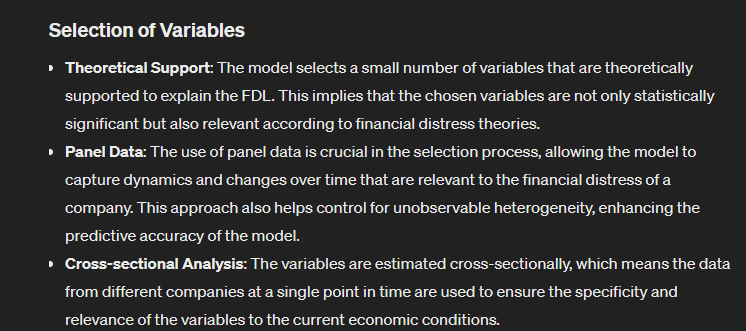

# Using Feature importance from the models

Decision Trees Classifier

In [139]:
importances_dtc = dtc.feature_importances_

In [144]:
indices_dtc = np.argsort(importances_dtc)[::-1]

# To get the top 5 features
for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices_dtc[f], importances_dtc[indices_dtc[f]]))

1. feature 21 (0.598941)
2. feature 0 (0.098665)
3. feature 26 (0.090875)
4. feature 37 (0.078418)
5. feature 27 (0.028740)
6. feature 34 (0.021241)
7. feature 32 (0.020235)
8. feature 15 (0.016095)
9. feature 12 (0.014911)
10. feature 22 (0.013158)


In [148]:
X_train.iloc[:, indices_dtc[:10]]


,PRETAX_INCOME,LagExcessReturn,MARKET_VALUE,s4,EBTDA,s1,l5,NET_SALES,COMMON_EQUITY,INCOME_TAXES
343,13388,-0.688841,23000.0,0.028389,16732.0,0.362293,0.656562,112489,77405,2526
344,-54233,-1.248457,19770.0,-0.528703,-35415.0,5.291726,2.012570,29514,14840,-7155
345,20300,0.406685,4833400.0,0.236136,223600.0,2.851623,0.811094,582300,1499500,1800
346,-20129,-1.130674,63250.0,-0.605770,-13033.0,1.874542,5.174590,14451,54558,0
347,-6080,-0.099303,57560.0,-0.027120,-5236.0,0.532525,1.621490,8655,36490,-616
...,...,...,...,...,...,...,...,...,...,...
11663,-163,0.247360,5280.0,0.004049,247.0,0.571544,0.943803,11175,4893,88
11665,27397,0.113012,526770.0,0.010412,39570.0,0.414532,0.350854,269323,227764,6542
11666,76146,0.398591,1286830.0,0.105196,112932.0,1.551751,0.194706,282950,356958,18038
11667,-2485,-1.121668,4980.0,-0.016575,-1810.0,0.856421,0.562184,2967,1025,-177


In [150]:
X_train_selected = X_train.iloc[:, indices_dtc[:10]]
X_test_selected = X_test.iloc[:, indices_dtc[:10]]

dtc.fit(X_train_selected, y_train)



DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=10, min_samples_split=310,
                       random_state=42)

In [151]:

# Use the best model to make predictions
y_pred_dtc_train = dtc.predict(X_train_selected)

# Use the best model to make predictions
y_pred_dtc_test = dtc.predict(X_test_selected)



In [152]:

# Calculate the accuracy of the model
accuracy_dtc_train = metrics.accuracy_score(y_train, y_pred_dtc_train)

# Calculate the accuracy of the model
accuracy_dtc_test = metrics.accuracy_score(y_test, y_pred_dtc_test)

print(f"Accuracy on training data: {accuracy_dtc_train}")
print(f"Accuracy on test data: {accuracy_dtc_test}")


Accuracy on training data: 0.7958779231074118
Accuracy on test data: 0.8214285714285714


In [153]:


# calculate the confusion matrix for the test data and the predictions of test data
conf_matrix_dtc = confusion_matrix(y_test, y_pred_dtc_test) 

# print the confusion matrix
print(conf_matrix_dtc)

# calculate the precision, recall, and f1 score
precision_dtc = metrics.precision_score(y_test, y_pred_dtc_test)

recall_dtc = metrics.recall_score(y_test, y_pred_dtc_test)

f1_score_dtc = metrics.f1_score(y_test, y_pred_dtc_test)

# print the precision, recall, and f1 score
print(f"Precision: {precision_dtc}")
print(f"Recall: {recall_dtc}")
print(f"F1 Score: {f1_score_dtc}")


[[1554  331]
 [  39  148]]
Precision: 0.3089770354906054
Recall: 0.7914438502673797
F1 Score: 0.4444444444444444


In [154]:

# Compare the performance of model using Type 1 error (T1), Type 2 error (T2), Total accuracy, and AUC as measures. (Cut-off point is 50%)

# calculate the True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN) values

TP_dtc = conf_matrix_dtc[1, 1]
TN_dtc = conf_matrix_dtc[0, 0]
FP_dtc = conf_matrix_dtc[0, 1]
FN_dtc = conf_matrix_dtc[1, 0]

# calculate the Type 1 error (T1)
T1_dtc = FP_dtc / (FP_dtc + TN_dtc)

# calculate the Type 2 error (T2)
T2_dtc = FN_dtc / (FN_dtc + TP_dtc)

# calculate the total accuracy
total_accuracy_dtc = (TP_dtc + TN_dtc) / (TP_dtc + TN_dtc + FP_dtc + FN_dtc)

# calculate the AUC
fpr_dtc, tpr_dtc, thresholds_dtc = metrics.roc_curve(y_test, y_pred_dtc_test)

AUC_dtc = metrics.auc(fpr_dtc, tpr_dtc)

# print the performance measures
print(f"Type 1 error: {T1_dtc}")
print(f"Type 2 error: {T2_dtc}")
print(f"Total accuracy: {total_accuracy_dtc}")
print(f"AUC: {AUC_dtc}")




Type 1 error: 0.17559681697612733
Type 2 error: 0.20855614973262032
Total accuracy: 0.8214285714285714
AUC: 0.8079235166456262


Random forest Classifier

In [161]:
importances_rfc = rfc.feature_importances_

In [166]:
indices_rfc = np.argsort(importances_rfc)[::-1]

# To get the top 5 features
for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices_rfc[f], importances_rfc[indices_rfc[f]]))

1. feature 39 (0.327160)
2. feature 44 (0.173192)
3. feature 20 (0.117724)
4. feature 0 (0.101397)
5. feature 18 (0.056553)
6. feature 40 (0.038534)
7. feature 27 (0.025938)
8. feature 34 (0.022401)
9. feature 3 (0.020933)
10. feature 5 (0.019171)


In [167]:
X_train.iloc[:, indices_rfc[:10]]

,p1,c2,EBIT,LagExcessReturn,OPERATING_INCOME,p2,EBTDA,s1,CURRENT_ASSETS,TOTAL_INTANGIBLE
343,0.093349,0.248259,13863.0,-0.688841,12756,0.142497,16732.0,0.362293,73856.0,1192.0
344,-0.682246,-0.024243,-35509.0,-1.248457,-13229,-1.193151,-35415.0,5.291726,59399.0,0.0
345,0.004739,0.045318,47800.0,0.406685,142800,0.006414,223600.0,2.851623,472300.0,1333200.0
346,-0.652075,0.202690,-12235.0,-1.130674,2555,-0.975842,-13033.0,1.874542,74778.0,6670.0
347,-0.132947,-0.056984,-5938.0,-0.099303,-6228,-0.148814,-5236.0,0.532525,14034.0,23876.0
...,...,...,...,...,...,...,...,...,...,...
11663,-0.022252,0.060638,-162.0,0.247360,-146,-0.051224,247.0,0.571544,10547.0,459.0
11665,0.061445,0.050957,27809.0,0.113012,28161,0.091564,39570.0,0.414532,94493.0,234504.0
11666,0.072998,0.117752,82650.0,0.398591,87300,0.092234,112932.0,1.551751,55092.0,151029.0
11667,-0.588334,-0.545990,-2455.0,-1.121668,-2452,-0.942921,-1810.0,0.856421,1668.0,1730.0


In [168]:
X_train_selected_rfc = X_train.iloc[:, indices_rfc[:10]]
X_test_selected_rfc = X_test.iloc[:, indices_rfc[:10]]

rfc.fit(X_train_selected_rfc, y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, min_samples_split=4, n_estimators=2,
                       random_state=42)

In [169]:

# Use the best model to make predictions
y_pred_rfc_train = rfc.predict(X_train_selected_rfc)

# Use the best model to make predictions
y_pred_rfc_test = rfc.predict(X_test_selected_rfc)



In [170]:

# Calculate the accuracy of the model
accuracy_rfc_train = metrics.accuracy_score(y_train, y_pred_rfc_train)

# Calculate the accuracy of the model
accuracy_rfc_test = metrics.accuracy_score(y_test, y_pred_rfc_test)

print(f"Accuracy on training data: {accuracy_rfc_train}")
print(f"Accuracy on test data: {accuracy_rfc_test}")


Accuracy on training data: 0.7508917954815696
Accuracy on test data: 0.7693050193050193


In [171]:

# calculate the confusion matrix for the test data and the predictions of test data
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc_test)

# print the confusion matrix
print(conf_matrix_rfc)

# calculate the precision, recall, and f1 score
precision_rfc = metrics.precision_score(y_test, y_pred_rfc_test)

recall_rfc = metrics.recall_score(y_test, y_pred_rfc_test)

f1_score_rfc = metrics.f1_score(y_test, y_pred_rfc_test)

# print the precision, recall, and f1 score

print(f"Precision: {precision_rfc}")
print(f"Recall: {recall_rfc}")
print(f"F1 Score: {f1_score_rfc}")


[[1454  431]
 [  47  140]]
Precision: 0.24518388791593695
Recall: 0.7486631016042781
F1 Score: 0.36939313984168864


In [172]:


# Compare the performance of model using Type 1 error (T1), Type 2 error (T2), Total accuracy, and AUC as measures. (Cut-off point is 50%)

# calculate the True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN) values
TP_rfc = conf_matrix_rfc[1, 1]
TN_rfc = conf_matrix_rfc[0, 0]
FP_rfc = conf_matrix_rfc[0, 1]
FN_rfc = conf_matrix_rfc[1, 0]

# calculate the Type 1 error (T1)
T1_rfc = FP_rfc / (FP_rfc + TN_rfc)

# calculate the Type 2 error (T2)
T2_rfc = FN_rfc / (FN_rfc + TP_rfc)

# calculate the total accuracy
total_accuracy_rfc = (TP_rfc + TN_rfc) / (TP_rfc + TN_rfc + FP_rfc + FN_rfc)

# calculate the AUC
fpr_rfc, tpr_rfc, thresholds_rfc = metrics.roc_curve(y_test, y_pred_rfc_test)

AUC_rfc = metrics.auc(fpr_rfc, tpr_rfc)

# print the performance measures
print(f"Type 1 error: {T1_rfc}")
print(f"Type 2 error: {T2_rfc}")
print(f"Total accuracy: {total_accuracy_rfc}")
print(f"AUC: {AUC_rfc}")

Type 1 error: 0.2286472148541114
Type 2 error: 0.25133689839572193
Total accuracy: 0.7693050193050193
AUC: 0.7600079433750833


Logistic Regression 

In [283]:
importance_lg = lg.coef_[0]

In [286]:
indices_lg = np.argsort(importance_lg)[::-1]

# To get the top 5 features
for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices_lg[f], importance_lg[indices_lg[f]]))


1. feature 11 (0.000037)
2. feature 13 (0.000034)
3. feature 19 (0.000027)
4. feature 20 (0.000022)
5. feature 9 (0.000020)
6. feature 25 (0.000018)
7. feature 31 (0.000012)
8. feature 8 (0.000011)
9. feature 4 (0.000010)
10. feature 5 (0.000009)


In [288]:
X_train.iloc[:, indices_lg[:15]]

,TOTAL_LIABILITIES,TOTAL_SHAREHOLDERS_EQUITY,INTEREST_EXPENSE_ON_DEBT,EBIT,WORKING_CAPITAL,OPERATING_CASH_FLOW,l4,CURRENT_LIABILITIES,PROPERTY_PLANT_EQUIPMENT,TOTAL_INTANGIBLE,INVENTORIES,TOTAL_EQUITY,GROSS_INCOME,COGSD,l5
343,40754,77405,475.0,13863.0,33694.0,29334,9.332863,40162.0,31202.0,1192.0,12053.0,77405,26347.0,82799.0,0.656562
344,156180,14840,18724.0,-35509.0,-1684.0,-4146,20.639161,61083.0,106713.0,0.0,1430.0,97789,1724.0,8972.0,2.012570
345,1660500,1499500,52800.0,47800.0,76000.0,144400,8.463663,396300.0,1380200.0,1333200.0,68800.0,2354100,184200.0,169500.0,0.811094
346,27089,54558,7895.0,-12235.0,60835.0,16549,5.346282,13943.0,189.0,6670.0,2703.0,54558,5536.0,1819.0,5.174590
347,4609,36490,142.0,-5938.0,11688.0,-2342,0.000000,2346.0,3189.0,23876.0,0.0,36717,3214.0,4597.0,1.621490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11663,6387,4893,1.0,-162.0,4217.0,684,0.000000,6330.0,193.0,459.0,0.0,4900,10198.0,567.0,0.943803
11665,111643,227764,412.0,27809.0,-10289.0,17295,0.000000,104782.0,8837.0,234504.0,0.0,227764,139438.0,117712.0,0.350854
11666,439068,356958,11880.0,82650.0,-67485.0,93734,0.000000,122577.0,589088.0,151029.0,0.0,630007,120589.0,120199.0,0.194706
11667,2541,1025,30.0,-2455.0,328.0,-1947,4.928571,1340.0,168.0,1730.0,602.0,2225,1318.0,974.0,0.562184


In [290]:
X_train_selected_lg = X_train.iloc[:, indices_lg[:15]]
X_test_selected_lg = X_test.iloc[:, indices_lg[:15]]

lg.fit(X_train_selected_lg, y_train)



LogisticRegression(class_weight='balanced', n_jobs=-1)

In [291]:

# Use the best model to make predictions
y_pred_lg_train = lg.predict(X_train_selected_lg)

# Use the best model to make predictions
y_pred_lg_test = lg.predict(X_test_selected_lg)



In [292]:

# Calculate the accuracy of the model
accuracy_lg_train = metrics.accuracy_score(y_train, y_pred_lg_train)

# Calculate the accuracy of the model
accuracy_lg_test = metrics.accuracy_score(y_test, y_pred_lg_test)


print(f"Accuracy on training data: {accuracy_lg_train}")
print(f"Accuracy on test data: {accuracy_lg_test}")


Accuracy on training data: 0.7502972651605232
Accuracy on test data: 0.7577220077220077


In [293]:


# calculate the confusion matrix for the test data and the predictions of test data
conf_matrix_lg = confusion_matrix(y_test, y_pred_lg_test)

# print the confusion matrix
print(conf_matrix_lg)

# calculate the precision, recall, and f1 score

precision_lg = metrics.precision_score(y_test, y_pred_lg_test)

recall_lg = metrics.recall_score(y_test, y_pred_lg_test)

f1_score_lg = metrics.f1_score(y_test, y_pred_lg_test)

# print the precision, recall, and f1 score
print(f"Precision: {precision_lg}")
print(f"Recall: {recall_lg}")
print(f"F1 Score: {f1_score_lg}")



[[1435  450]
 [  52  135]]
Precision: 0.23076923076923078
Recall: 0.7219251336898396
F1 Score: 0.34974093264248707


In [294]:

# Compare the performance of model using Type 1 error (T1), Type 2 error (T2), Total accuracy, and AUC as measures. (Cut-off point is 50%)

# calculate the True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN) values
TP_lg = conf_matrix_lg[1, 1]
TN_lg = conf_matrix_lg[0, 0]
FP_lg = conf_matrix_lg[0, 1]
FN_lg = conf_matrix_lg[1, 0]

# calculate the Type 1 error (T1)
T1_lg = FP_lg / (FP_lg + TN_lg)

# calculate the Type 2 error (T2)
T2_lg = FN_lg / (FN_lg + TP_lg)

# calculate the total accuracy
total_accuracy_lg = (TP_lg + TN_lg) / (TP_lg + TN_lg + FP_lg + FN_lg)

# calculate the AUC
fpr_lg, tpr_lg, thresholds_lg = metrics.roc_curve(y_test, y_pred_lg_test)

AUC_lg = metrics.auc(fpr_lg, tpr_lg)

# print the performance measures
print(f"Type 1 error: {T1_lg}")
print(f"Type 2 error: {T2_lg}")
print(f"Total accuracy: {total_accuracy_lg}")
print(f"AUC: {AUC_lg}")



Type 1 error: 0.23872679045092837
Type 2 error: 0.27807486631016043
Total accuracy: 0.7577220077220077
AUC: 0.7415991716194555
